In [44]:
# https://zenn.dev/omochimaru/articles/9b289f4a9455b7 の写経

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# データをインポートしてDataFrameの内容とデータ型、欠損の確認をする
from sklearn.datasets import fetch_california_housing
california_housing_data = fetch_california_housing()
# 目的変数
tar_data = pd.DataFrame(california_housing_data.target, columns=['HousingPrices'])
# 説明変数
exp_data = pd.DataFrame(california_housing_data.data, columns=california_housing_data.feature_names)
# データを結合
data = pd.concat([exp_data, tar_data], axis=1)
display(data.head())
print(data.shape) # (20640, 9)
print(data.dtypes) # 全てfloat64
print(data.isnull().sum()) # 全て0
# MedInc = Medium Income

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(20640, 9)
MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
HousingPrices    float64
dtype: object
MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
HousingPrices    0
dtype: int64


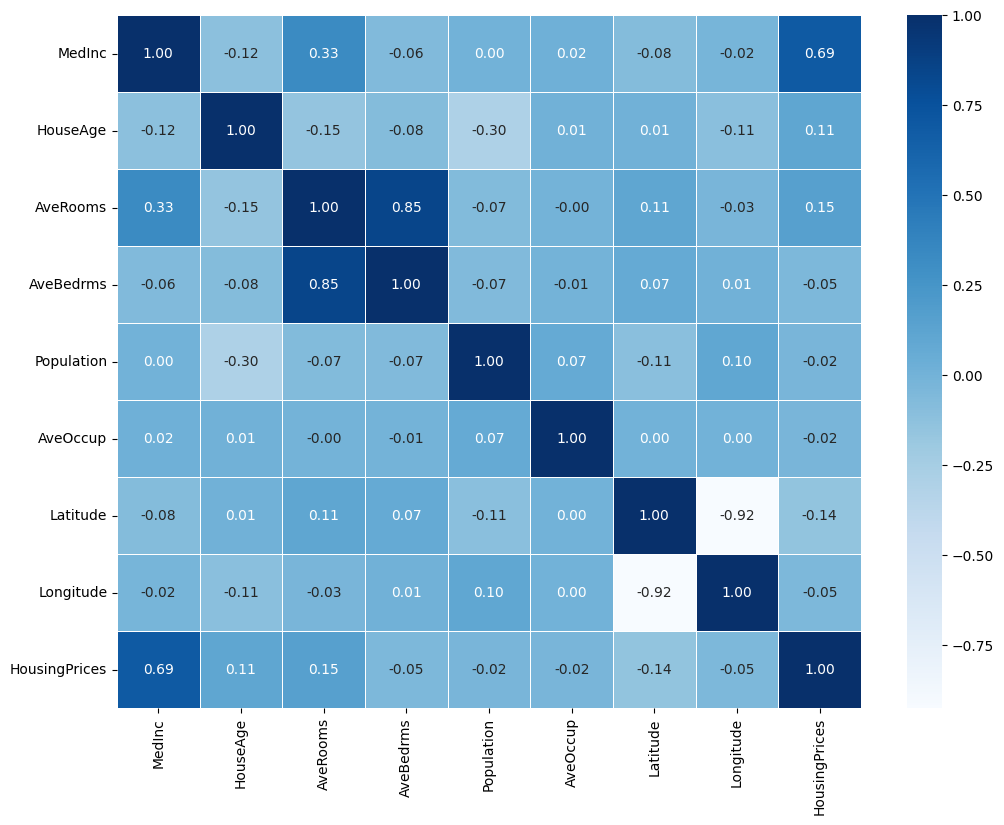

In [34]:
# ヒートマップを表示
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)

,MedInc,HousingPrices
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


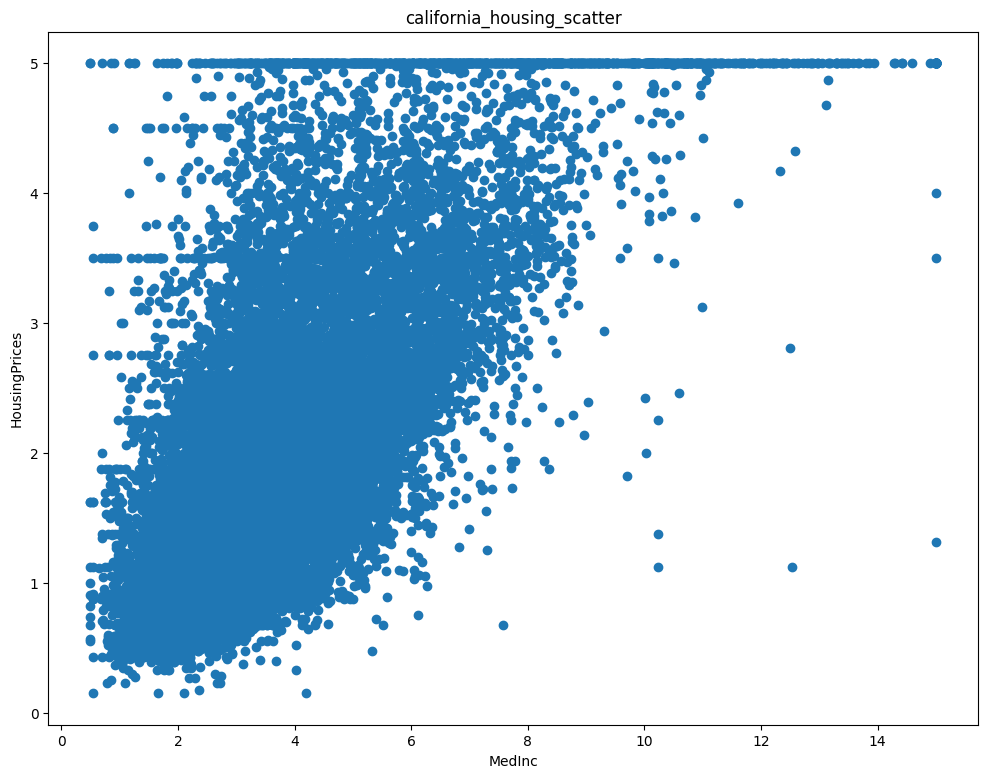

In [35]:
exp_var = 'MedInc'
tar_var = 'HousingPrices'

# 散布図を表示
plt.figure(figsize=(12, 9))
plt.scatter(data[exp_var], data[tar_var])
plt.xlabel(exp_var)
plt.ylabel(tar_var)

# 記述統計量を確認
data[[exp_var, tar_var]].describe()

95パーセンタイルの分位数 4.898099999999999


,MedInc,HousingPrices
count,19608.000000,19608.000000
mean,3.670824,1.914383
std,1.564842,0.962432
min,0.499900,0.149990
25%,2.524875,1.163000
50%,3.444950,1.734000
75%,4.576025,2.473000
max,15.000100,4.898000


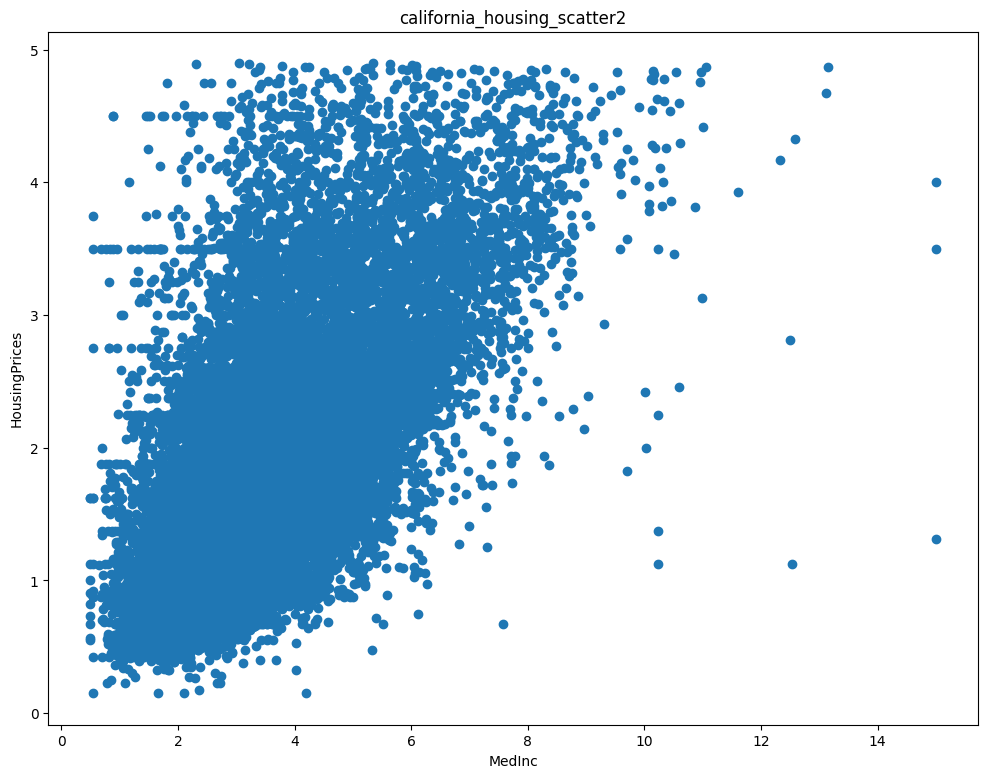

In [36]:
# 外れ値を除去
# 元ページではexp_varの95パーセンタイルで絞り込んでいたが、外れ値はtar_varの方なので変更
q_95 = data[tar_var].quantile(0.95)
print('95パーセンタイルの分位数', q_95)

# 絞り込む
data = data[data[tar_var] < q_95]

# 散布図を表示
plt.figure(figsize=(12, 9))
plt.scatter(data[exp_var], data[tar_var])
plt.xlabel(exp_var)
plt.ylabel(tar_var)

# 記述統計量を確認
data[[exp_var, tar_var]].describe()

In [ ]:
# HousingPricesの平均値と中央値の差が小さくなっており、散布図も綺麗になっている
# しかし、MedIncの外れ値が散見されるのでこちらも絞り込みが必要そう

95パーセンタイルの分位数 6.546104999999992


,MedInc,HousingPrices
count,18627.000000,18627.000000
mean,3.464016,1.830136
std,1.289390,0.897517
min,0.499900,0.149990
25%,2.474250,1.134000
50%,3.342700,1.671000
75%,4.357100,2.346000
max,6.543700,4.898000


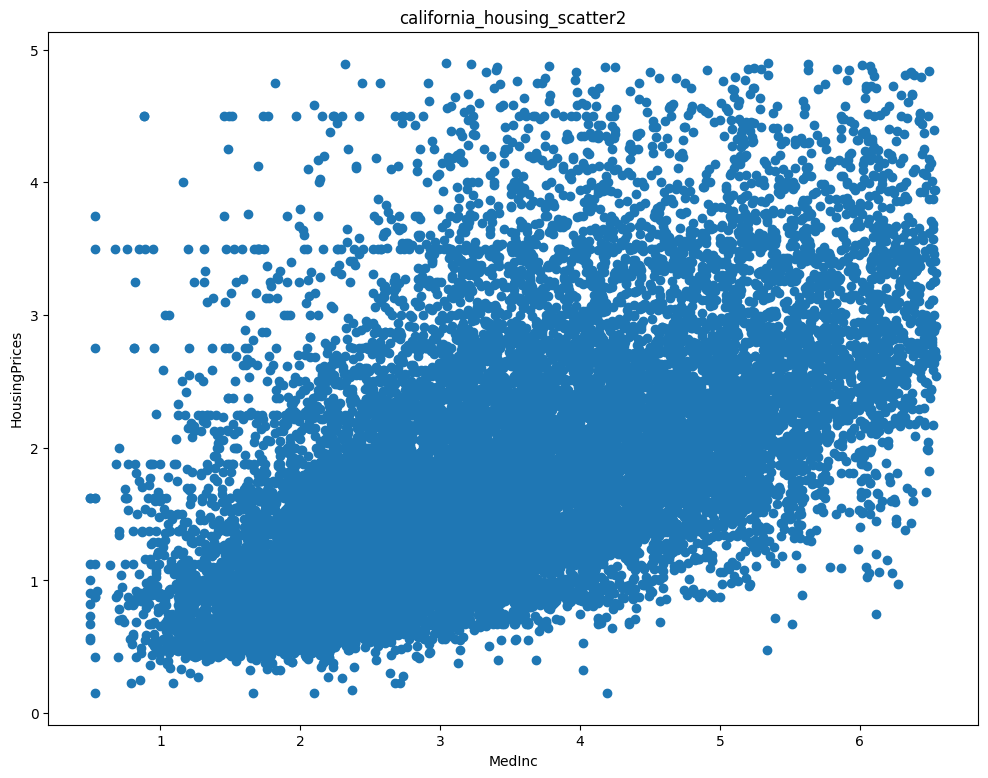

In [40]:
q_95 = data[exp_var].quantile(0.95)
print('95パーセンタイルの分位数', q_95)

# 絞り込む
data = data[data[exp_var] < q_95]

# 散布図を表示
plt.figure(figsize=(12, 9))
plt.scatter(data[exp_var], data[tar_var])
plt.xlabel(exp_var)
plt.ylabel(tar_var)

# 記述統計量を確認
data[[exp_var, tar_var]].describe()

In [41]:
# 説明変数と目的変数にデータを分割
X = data[[exp_var]]
print(data.shape)
display(X.head())
y = data[[tar_var]]
print(y.shape)
display(y.head())

# 学習
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

(18627, 9)


,MedInc
3,5.6431
4,3.8462
5,4.0368
6,3.6591
7,3.1200


(18627, 1)


,HousingPrices
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414


LinearRegression()

In [42]:
# 精度の確認
print('回帰直線の切片', model.intercept_[0])
print('回帰係数', model.coef_[0][0])
print('決定係数', model.score(X, y))
print('回帰直線', 'y = ', model.coef_[0][0], 'x + ', model.intercept_[0])

回帰直線の切片 0.44720150398282454
回帰係数 0.3992286695660803
決定係数 0.3289475229026786
回帰直線 y =  0.3992286695660803 x +  0.44720150398282454


In [ ]:
# 決定係数が低く、精度は悪そう

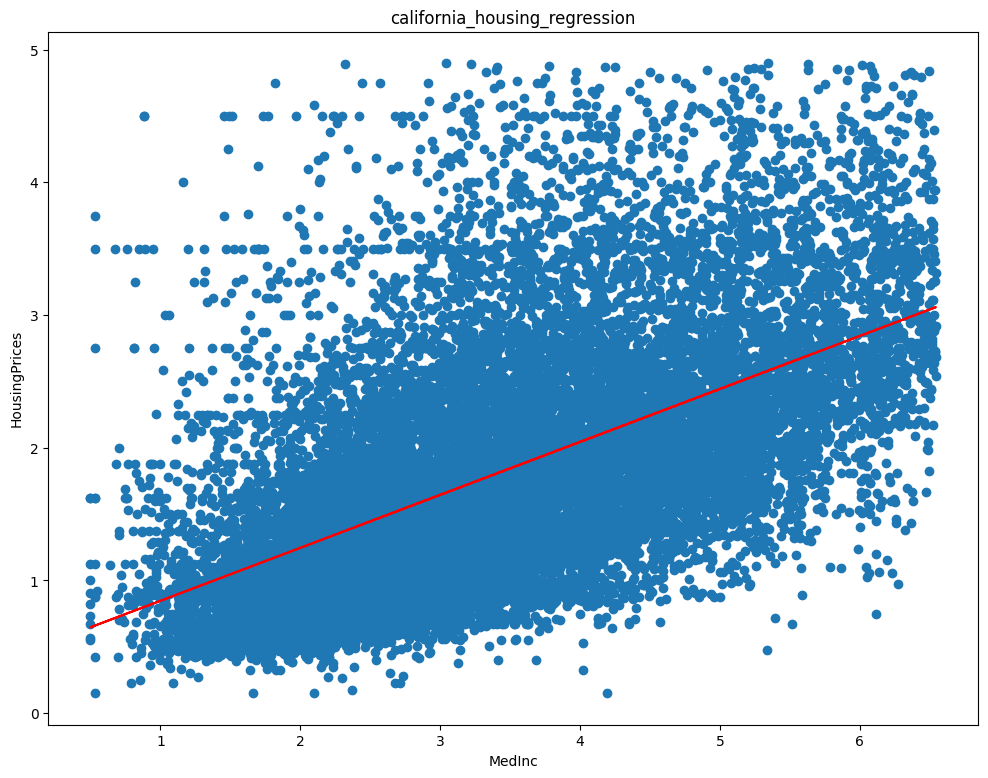

In [43]:
# 回帰直線と散布図を表示
plt.figure(figsize=(12, 9))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel(exp_var)
plt.ylabel(tar_var)

In [ ]:
# 説明変数が1つの単回帰分析では限界がありそう（そもそもめちゃくちゃ分散してるし）